# Summary
|  |  |
|:---|:---|
|**Step 1** | Retrieve and Structure Data      |
|**Step 2** | Verify Data Quality          |
|**Step 3** | Visualization |
|**Step 4** | Translate Text |
|**Step 5** | Split base into Train and Test |





In [ ]:
!pip install deep_translator;

In [ ]:
# Libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from sklearn.model_selection import train_test_split


### **Step 1: Download Dataset**

The dataset used in this work can be downloaded using the link below and should then be uploaded to the notebook session.

[Database link](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news/data)

In [ ]:
# Data reading:
base_news = pd.read_csv('/content/all-data.csv', names=["Sentiment", "Text EN"], encoding="utf-8", encoding_errors="replace")
base_news.head()

,Sentiment,Text EN
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


### **Step 2: Verify Data Quality**

Based on [Oracle Financial Services Accounting Foundation Cloud Service](https://docs.oracle.com/en/industries/financial-services/ofs-analytical-applications/accounting-foundation/22d/catalog/index.html)



This process involves a series of checks to ensure the integrity and quality of the data in the DataFrame. The following steps are conducted:



1.   **Blank Value Check:** Identifies if the DataFrame contains any completely empty values, either represented as NaN or as blank spaces. If all entries are empty, it indicates a big issue with data completeness.

2.  **NULL Value Check:** Determines if there are any NULL values present in the DataFrame. It assesses whether any individual cell contains a missing value. Identifying NULL values is crucial as they can affect analysis and calculations.

3. **Duplicate Check:** Search for duplicate rows within the DataFrame. Duplicate entries can lead to inaccuracies in data analysis, making this step essential for ensuring data uniqueness.

4. **Referential Integrity Check:** Ensures that each element in the specified column is a string (news headline).



In [ ]:
# Setting the data to be checked:
df = base_news

print('          DATA QUALITY CHECK')
print('--------------------------------------')
# Blank Value Check (only blank spaces or NaN):
empty_check = df.isnull().all().all() or (df.astype(str).apply(lambda x: x.str.strip() == '').all()).all()
print(f'Empty value check: ......... {"✅" if not empty_check else "❌ needs correction"} {"Ok" if not empty_check else "Needs correction"}')

# NULL Value Check:
null_check = df.isnull().any().any() or (df.astype(str).apply(lambda x: x.str.strip() == '').any()).any()
print(f'Null value check: .......... {"✅" if not null_check else "❌"} {"Ok" if not null_check else "Needs correction"}')

# Duplicate Check:
duplicate_check = (df.duplicated().sum() > 0)
print(f'Duplicate check: ........... {"✅" if not duplicate_check else "❌"} {"Ok" if not duplicate_check else "Needs correction"}')

# Referential Integrity Check:
all_text = df['Text EN'].apply(lambda x: isinstance(x, str)).all()
print(f'Data integrity check: ...... {"✅" if all_text else "❌"} {"Ok" if all_text else "Needs correction"}')


          DATA QUALITY CHECK
--------------------------------------
Empty value check: ......... ✅ Ok
Null value check: .......... ✅ Ok
Duplicate check: ........... ❌ Needs correction
Data integrity check: ...... ✅ Ok


##### Step 2.1 - Correcting data

In [ ]:
# View duplicate data:
base_news[base_news.duplicated(keep= False)]

,Sentiment,Text EN
1098,neutral,The issuer is solely responsible for the conte...
1099,neutral,The issuer is solely responsible for the conte...
1415,neutral,The report profiles 614 companies including ma...
1416,neutral,The report profiles 614 companies including ma...
2395,neutral,Ahlstrom 's share is quoted on the NASDAQ OMX ...
2396,neutral,Ahlstrom 's share is quoted on the NASDAQ OMX ...
2566,neutral,SSH Communications Security Corporation is hea...
2567,neutral,SSH Communications Security Corporation is hea...
3093,neutral,Proha Plc ( Euronext :7327 ) announced today (...
3094,neutral,Proha Plc ( Euronext :7327 ) announced today (...


In [ ]:
# Removing duplicates from DataFrame:
base_news.drop_duplicates(inplace=True)

# Check data integrity again:
# Duplicate Check:
duplicate_check = (df.duplicated().sum() > 0)
print(f'Duplicate check: ........... {"✅" if not duplicate_check else "❌"} {"Ok" if not duplicate_check else "Needs correction"}')

Duplicate check: ........... ✅ Ok


### **Step 3: Visualization**

This step involves a simple visualization to enhance the understanding of the categories' distribution in the dataset. Each headline is classified based on sentiment from the perspective of a retail investor.


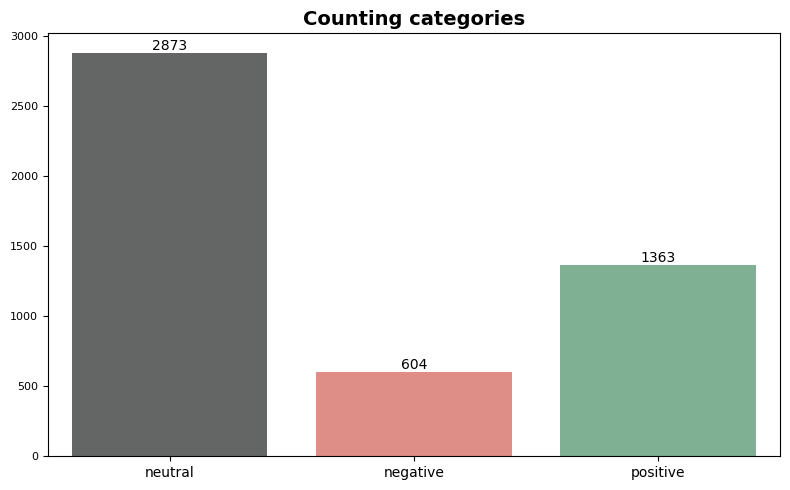

In [ ]:
# Ploting categories:
plt.figure(figsize=(8, 5))
sns.countplot(data = base_news, x='Sentiment', hue = 'Sentiment',
              palette =['#646665', '#ed8179', '#77b892'], legend = False)

# Adding title:
plt.title('Counting categories', fontsize=14, fontweight='semibold')
plt.xlabel('')
plt.ylabel('')

# Adding annotation over bars:
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

# Customizing ticks
plt.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show();

### **Step 4: Translate Text**

In order to create a model suitable for the Brazilian market, the headlines need to be in Portuguese. Google Translate is used to translate them, and a new column (Text PT) is added to the original DataFrame.

In [ ]:
# Function to translate from english to portuguese:
def translate_to_pt(texto):
    try:
        return GoogleTranslator(source='en', target='pt').translate(texto)
    except Exception as e:
        return None

In [ ]:
# Create a new column 'Text PT' with text translation:
base_news['Text PT'] = base_news['Text EN'].apply(translate_to_pt)
base_news.head()

,Sentiment,Text EN,Text PT
0,neutral,"According to Gran , the company has no plans t...","De acordo com Gran, a empresa não tem planos d..."
1,neutral,Technopolis plans to develop in stages an area...,A Technopolis planeja desenvolver em etapas um...
2,negative,The international electronic industry company ...,A empresa internacional da indústria eletrônic...
3,positive,With the new production plant the company woul...,Com a nova planta de produção a empresa aument...
4,positive,According to the company 's updated strategy f...,De acordo com a estratégia atualizada da empre...


In [ ]:
# Saving full DataFrame as csv file:
base_news.to_csv('base_news.csv', index = False)

# Creating a new DataFrame for portuguese text only:
base_news_pt = base_news
base_news_pt.drop('Text EN', axis = 1, inplace = True)

# Saving as csv file:
base_news_pt.to_csv('base_news_pt.csv', index = False)

### **Step 5: Split base into Train and Test**

This step shuffles the original DataFrame and splits it into two others. The first, containing 75% of the data, is used to train the Natural Language Processing (NLP) model. The second, containing 25% of the data, is used to test the aforementioned model.


In [ ]:
# Split the DataFrame into training (75%) and testing (25%):
base_news_pt_train, base_news_pt_test = train_test_split(base_news_pt, test_size=0.25, random_state=42)

# Verify the split:
print(f"Training df size: {len(base_news_pt_train)}")
print(f"Testing df size: {len(base_news_pt_test)}")

Training df size: 3630
Testing df size: 1210


In [ ]:
# Saving test and train as csv files:
base_news_pt_train.to_csv('base_news_pt_train.csv', index = False)
base_news_pt_test.to_csv('base_news_pt_test.csv', index = False)



---

